# Proyek Analisis Data : E-Commerce Public Dataset
- Nama:  Zulfikar Muhammad Abdurrozak
- Email: zulfikarabdurrozak@gmail.com
- Id Dicoding: zlfkrmuhammad

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan bulanan atau tiap kuartal?
- Berapa lama rata-rata waktu pengiriman produk?
- Bagaimana kinerja penjualan di berbagai wilayah Brasil?
- Hari apa yang customer sering untuk melakukan transaksi?
- Bagaimana pengaruh tingkat kepuasan terhadap lama pengiriman?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import streamlit as st
import datetime as dt
from googletrans import Translator
import matplotlib.dates as mdates
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\customers_dataset.csv"
)
print(customers_df.shape)
customers_df.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\geolocation_dataset.csv"
)
print(geolocation_df.shape)
geolocation_df.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\order_items_dataset.csv"
)
print(order_items_df.shape)
order_items_df.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\order_payments_dataset.csv"
)
print(order_payments_df.shape)
order_payments_df.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\order_reviews_dataset.csv"
)
print(order_reviews_df.shape)
order_reviews_df.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\orders_dataset.csv"
)
print(orders_df.shape)
orders_df.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_translate_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\product_category_name_translation.csv"
)
print(product_translate_df.shape)
product_translate_df.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\products_dataset.csv"
)
print(products_df.shape)
products_df.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv(
    r"D:\Python\proyek_analisis_data\submission\E-Commerce Public Dataset\sellers_dataset.csv"
)
print(sellers_df.shape)
sellers_df.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Dataset `customer_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [13]:
customers_df.duplicated().sum()

0

#### Dataset `geolocation_df`

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [16]:
geolocation_df[
    geolocation_df.geolocation_zip_code_prefix
    == geolocation_df.geolocation_zip_code_prefix.max()
]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999758,99990,-28.329718,-51.769615,muliterno,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


#### Dataset `order_items_df`

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.duplicated().sum()

0

In [20]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### Dataset `order_payments_df`

In [21]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
order_payments_df.duplicated().sum()

0

In [23]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [24]:
order_payments_df[
    order_payments_df.payment_sequential == order_payments_df.payment_sequential.max()
]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


####  Dataset `order_reviews_df`

In [25]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [26]:
order_reviews_df.duplicated().sum()

0

In [27]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### Dataset `orders_df`

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [29]:
orders_df.duplicated().sum()

0

In [30]:
orders_df[orders_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


#### Dataset `product_translate_df`

In [31]:
product_translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [32]:
product_translate_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [33]:
product_translate_df.duplicated().sum()

0

#### Dataset `products_df`

In [34]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [36]:
products_df.duplicated().sum()

0

In [37]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [38]:
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [39]:
products_df.value_counts()

product_id                        product_category_name              product_name_lenght  product_description_lenght  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  product_width_cm
00066f42aeeb9f3007548bb9d3f33c38  perfumaria                         53.0                 596.0                       6.0                 300.0             20.0               16.0               16.0                1
ab5da1daa941470d14366f4e76a99dd2  eletrodomesticos                   57.0                 953.0                       3.0                 100.0             30.0               10.0               15.0                1
ab89689c2d13440b8152183ddee2ed81  esporte_lazer                      53.0                 483.0                       2.0                 12150.0           80.0               38.0               39.0                1
ab7be0a001c3104b4931ce39ed70857d  informatica_acessorios             42.0                 446.0                       1.0                 800

In [40]:
column_product = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]
products_df[column_product].mode().iloc[0]

product_weight_g     200.0
product_length_cm     16.0
product_height_cm     10.0
product_width_cm      11.0
Name: 0, dtype: float64

In [41]:
products_df[products_df[column_product].isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
products_df[products_df["product_category_name"] == "bebes"]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
11,03b63c5fc16691530586ae020c345514,bebes,49.0,728.0,4.0,7150.0,50.0,19.0,45.0
23,8b41fbc2b984a12030090112324d1bc4,bebes,55.0,1627.0,1.0,500.0,20.0,13.0,13.0
35,5370b82a213393979691c98074265584,bebes,52.0,708.0,9.0,7950.0,33.0,30.0,44.0
43,b864b103180d5a6a3f830e67f93e8735,bebes,47.0,980.0,4.0,600.0,70.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...
32823,cba32576375902a87170bedaed045b71,bebes,58.0,1882.0,4.0,11467.0,35.0,57.0,52.0
32851,026311ea0b72ef8c80ebf91efd36b499,bebes,52.0,708.0,1.0,300.0,18.0,8.0,24.0
32853,34c84b2e246f5904a5b3597b00240ea2,bebes,55.0,1636.0,1.0,600.0,20.0,13.0,13.0
32935,d4484cc239fbd0ac671ab04d931edc66,bebes,42.0,414.0,2.0,150.0,23.0,15.0,15.0


In [43]:
products_df[products_df["product_category_name"] == "bebes"].mode().iloc[0]

product_id                    011377a7487fef47fc9e73fa5f7322a6
product_category_name                                    bebes
product_name_lenght                                       60.0
product_description_lenght                               224.0
product_photos_qty                                         1.0
product_weight_g                                         200.0
product_length_cm                                         20.0
product_height_cm                                         25.0
product_width_cm                                          15.0
Name: 0, dtype: object

#### Dataset `sellers_df`

In [44]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [46]:
sellers_df.duplicated().sum()

0

### Cleaning Data

#### Dataset `order_items_df`

In [47]:
order_items_df = order_items_df.astype(
    {"shipping_limit_date": "datetime64[ns]", "order_item_id": "float64"}
)
order_items_df.loc[:, "price_per_product"] = (
    order_items_df["price"] / order_items_df["order_item_id"]
)

#### Dataset `order_reviews_df`

In [48]:
order_reviews_df["review_comment_title"].fillna(
    "Prefiro não fornecer comentários de revisão", inplace=True
)
order_reviews_df["review_comment_message"].fillna(
    "Prefiro não fornecer comentários de revisão", inplace=True
)

In [49]:
order_reviews_df = order_reviews_df.astype(
    {
        "review_creation_date": "datetime64[ns]",
        "review_answer_timestamp": "datetime64[ns]",
    }
)

#### Dataset `orders_df`

In [50]:
orders_df = orders_df.astype(
    {
        "order_purchase_timestamp": "datetime64[ns]",
        "order_approved_at": "datetime64[ns]",
        "order_delivered_carrier_date": "datetime64[ns]",
        "order_delivered_customer_date": "datetime64[ns]",
        "order_estimated_delivery_date": "datetime64[ns]",
    }
)

In [51]:
columns_to_check = [
    "order_id",
    "customer_id",
    "order_status",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
orders_df[columns_to_check].fillna("", inplace=True)

In [52]:
orders_df[orders_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


#### Dataset `products_df`

In [53]:
columns_to_check = [
    "product_id",
    "product_category_name",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
]
products_df.dropna(subset=columns_to_check, inplace=True)

In [54]:
columns_to_fill = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]
values_to_fill = [200, 20, 25, 15]

products_df.loc[:, columns_to_fill].fillna(
    value=dict(zip(columns_to_fill, values_to_fill))
)

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,225.0,16.0,10.0,14.0
1,1000.0,30.0,18.0,20.0
2,154.0,18.0,9.0,15.0
3,371.0,26.0,4.0,26.0
4,625.0,20.0,17.0,13.0
...,...,...,...,...
32946,12300.0,40.0,40.0,40.0
32947,1700.0,16.0,19.0,16.0
32948,1400.0,27.0,7.0,27.0
32949,700.0,31.0,13.0,20.0


### Merging, Asessing, and Cleaning Dataset `all_order_df`

#### Merging

In [55]:
# Menggabungkan products_df dengan product_translate
all_products = products_df.merge(
    product_translate_df,
    left_on="product_category_name",
    right_on="product_category_name",
    how="left",
)

# Menggabungkan data all_products ke dataset all_order_item_df
all_order_items_df = order_items_df.merge(
    all_products, left_on="product_id", right_on="product_id", how="right"
)

# Menggabungkan dataset order_payments_df ke dataset all_order_items_df
all_order_items_df = all_order_items_df.merge(
    order_payments_df, left_on="order_id", right_on="order_id"
)

# Menggabungkan dataset order_df ke dataset all_order_items_df
all_order_items_df = all_order_items_df.merge(
    orders_df, left_on="order_id", right_on="order_id"
)

# Menggabungkan dataset order_reviews_df ke dataset all_order_item
all_order_items_df = all_order_items_df.merge(
    order_reviews_df[["order_id", "review_score"]],
    left_on="order_id",
    right_on="order_id",
    how="left",
)

# Menggabungkan dataset sellers_df ke dataset all_order_df
all_order_df = all_order_items_df.merge(
    sellers_df, left_on="seller_id", right_on="seller_id", how="left"
)

# Menggabungkan dataset customers_df ke dataset all_order_df
all_order_df = all_order_df.merge(customers_df, on="customer_id", how="inner")

#### Assessing

In [56]:
all_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116598 entries, 0 to 116597
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116598 non-null  object        
 1   order_item_id                  116598 non-null  float64       
 2   product_id                     116598 non-null  object        
 3   seller_id                      116598 non-null  object        
 4   shipping_limit_date            116598 non-null  datetime64[ns]
 5   price                          116598 non-null  float64       
 6   freight_value                  116598 non-null  float64       
 7   price_per_product              116598 non-null  float64       
 8   product_category_name          116598 non-null  object        
 9   product_name_lenght            116598 non-null  float64       
 10  product_description_lenght     116598 non-null  float64       
 11  

In [57]:
print(f"jumlah duplikasi: {all_order_df.duplicated().sum()}")

jumlah duplikasi: 413


In [58]:
all_order_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_per_product,product_category_name,product_name_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,review_score,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,116598,116598.000000,116598,116598,116598,116598.000000,116598.000000,116598.000000,116598,116598.000000,...,114081,116598,115634.000000,116598.000000,116598,116598,116598,116598.000000,116598,116598
unique,97276,NaN,32341,3035,NaN,NaN,NaN,NaN,73,NaN,...,NaN,NaN,NaN,NaN,604,23,94107,NaN,4095,27
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,cama_mesa_banho,NaN,...,NaN,NaN,NaN,NaN,sao paulo,SP,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP
freq,63,NaN,536,2155,NaN,NaN,NaN,NaN,11988,NaN,...,NaN,NaN,NaN,NaN,29063,83139,75,NaN,18412,49142
mean,NaN,1.196950,NaN,NaN,2018-01-06 16:51:33.753160448,120.771353,20.061978,114.956573,NaN,48.767878,...,2018-01-13 15:17:20.570454528,2018-01-23 22:13:25.104718592,4.034229,24501.872382,NaN,NaN,NaN,35051.883266,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,0.060000,NaN,5.000000,...,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,1001.000000,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-19 03:35:17.500000,39.900000,13.080000,34.900000,NaN,42.000000,...,2017-09-25 17:42:16,2017-10-03 00:00:00,4.000000,6429.000000,NaN,NaN,NaN,11310.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-25 17:21:29.500000,74.900000,16.320000,69.000000,NaN,52.000000,...,2018-02-01 23:56:10,2018-02-15 00:00:00,5.000000,13660.000000,NaN,NaN,NaN,24315.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 12:13:15.750000128,134.900000,21.220000,129.000000,NaN,57.000000,...,2018-05-15 18:57:44,2018-05-25 00:00:00,5.000000,28495.000000,NaN,NaN,NaN,58595.000000,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,6735.000000,NaN,76.000000,...,2018-10-17 13:22:46,2018-10-25 00:00:00,5.000000,99730.000000,NaN,NaN,NaN,99980.000000,NaN,NaN


#### Cleaning

In [59]:
# # Menghapus kolom yang tidak diperlukan
# column_to_drop = ["payment_sequential", "payment_installments", "customer_unique_id"]
# all_order_df.drop(columns=column_to_drop, inplace=True)

In [60]:
# Mengurutkan kolom dan menghapus kolom yang tidak diperlukan
column_order = [
    "order_id",
    "order_item_id",
    "order_status",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "review_score",
    "product_id",
    "product_category_name_english",
    "product_category_name",
    "price_per_product",
    "freight_value",
    "payment_value",
    "customer_id",
    "customer_zip_code_prefix",
    "customer_city",
    "customer_state",
    "seller_id",
    "seller_zip_code_prefix",
    "seller_city",
    "seller_state",
    "shipping_limit_date",
]
all_order_df = all_order_df[column_order]
all_order_df

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,product_id,...,payment_value,customer_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,shipping_limit_date
0,e17e4f88e31525f7deef66779844ddce,1.0,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,5.0,1e9e8ef04dbcff4541ed26657ea517e5,...,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,13848,mogi-guacu,SP,5670f4db5b62c43d542e1b2d56b0cf7c,3694,sao paulo,SP,2018-04-30 17:33:54
1,5236307716393b7114b53ee991f36956,1.0,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,5.0,3aa071139cb16b67ca9e5dea641aaa2f,...,265.99,03fc97548af8f58fefc768d12b546c9c,20551,rio de janeiro,RJ,b561927807645834b59ef0d16ba55a24,2955,sao paulo,SP,2018-02-06 19:11:15
2,01f66e58769f84129811d43eefd187fb,1.0,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,5.0,96bd76ec8810374ed1b65e291975717f,...,87.62,e41819d1c95c12c9ce495b630eab8aee,5821,sao paulo,SP,7b07b3c7487f0ea825fc6df75abd658b,2016,sao paulo,SP,2018-07-11 21:30:20
3,143d00a4f2dde4e0364ee1821577adb3,1.0,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,1.0,cef67bcfe19066a932b7673e239eb23d,...,121.84,322162b5ca010c2b059cb5224dd818b1,2018,sao paulo,SP,c510bc1718f0f2961eaa42a23330681a,13330,indaiatuba,SP,2018-08-07 09:10:13
4,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,5.0,9dc1a7de274444849c219cff195d0b71,...,46.19,c11c31965ff02cc1d7132df8edfcbc22,5835,sao paulo,SP,0be8ff43f22e456b4e0371b2245e4d01,4461,sao paulo,SP,2018-04-17 01:30:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116593,59e88b7d3675e89aceaf86f372d3bc9a,2.0,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02,4.0,83808703fc0706a22e264b9d75f04a2e,...,92.02,e750210dde7e68dbd5194c0809e97f7e,38130,campo florido,MG,4324dd16853115efb0fd9d0d131ba6f4,13720,sao jose do rio pardo,SP,2018-01-10 03:32:09
116594,6e4465d771f02e4fe335225de3c6c043,1.0,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05,5.0,83808703fc0706a22e264b9d75f04a2e,...,159.54,0f139d1b208a62a37671423e5eff5016,46190,paramirim,BA,4324dd16853115efb0fd9d0d131ba6f4,13720,sao jose do rio pardo,SP,2018-03-14 02:30:48
116595,6e4465d771f02e4fe335225de3c6c043,2.0,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05,5.0,83808703fc0706a22e264b9d75f04a2e,...,159.54,0f139d1b208a62a37671423e5eff5016,46190,paramirim,BA,4324dd16853115efb0fd9d0d131ba6f4,13720,sao jose do rio pardo,SP,2018-03-14 02:30:48
116596,6e4465d771f02e4fe335225de3c6c043,3.0,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05,5.0,83808703fc0706a22e264b9d75f04a2e,...,159.54,0f139d1b208a62a37671423e5eff5016,46190,paramirim,BA,4324dd16853115efb0fd9d0d131ba6f4,13720,sao jose do rio pardo,SP,2018-03-14 02:30:48


In [61]:
all_order_df.drop_duplicates(inplace=True)

In [62]:
# Inisiasi projek translator
translator = Translator()


# Fungsi untuk menerjemahkan nilai NaN
def translate_category(row):
    if pd.isna(row["product_category_name_english"]):
        try:
            translated = translator.translate(
                row["product_category_name"], src="pt", dest="en"
            )
            return translated.text
        except Exception as e:
            print(f"Translation error: {e}")
            return row["product_category_name_english"]
    else:
        return row["product_category_name_english"]


# Terapkan fungsi ke DataFrame
all_order_df["product_category_name_english"] = all_order_df.apply(
    translate_category, axis=1
)

In [63]:
# Membuat dataset yang berisi semua transaksi yang berhasil
all_success_order_df = all_order_df.dropna()

# Membuat dataset yang berisi transaksi yang failed
all_uncomplete_order_df = all_order_df[all_order_df.isna().any(axis=1)]

In [64]:
# DataFrame Transaksi
transaction_columns = [
    "order_id",
    "order_item_id",
    "seller_id",
    "customer_id",
    "shipping_limit_date",
    "price_per_product",
    "freight_value",
    "payment_value",
    "order_status",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "seller_city",
    "seller_state",
    "customer_city",
    "customer_state",
]

df_transaction = all_success_order_df[transaction_columns]

# DataFrame Produk
product_columns = [
    "product_id",
    "product_category_name",
    "product_category_name_english",
]

df_product = all_success_order_df[product_columns]

## Exploratory Data Analysis

In [97]:
# Membuat variabel total order time
all_success_order_df.loc[:, "total_order_time"] = (
    all_success_order_df["order_delivered_customer_date"]
    - all_success_order_df["order_purchase_timestamp"]
)

In [98]:
all_success_order_df.loc[:, "transaction_day"] = all_success_order_df[
    "order_purchase_timestamp"
].dt.day_name()
all_success_order_df.loc[:, "transaction_month"] = all_success_order_df[
    "order_purchase_timestamp"
].dt.month_name()
all_success_order_df.loc[:, "transaction_year"] = all_success_order_df[
    "order_purchase_timestamp"
].dt.year
all_success_order_df.loc[:, "transaction_hour"] = all_success_order_df[
    "order_purchase_timestamp"
].dt.hour
all_success_order_df.loc[:, "total_order_hours"] = all_success_order_df[
    "total_order_time"
] / pd.Timedelta(hours=1)

: 

Tren Penjualan Bulanan atau Tiap Kuartal

In [67]:
# Tren Penjualan Bulanan
all_success_order_df.groupby(
    all_success_order_df["order_purchase_timestamp"].dt.to_period("M")
).agg(
    {
        "order_id": "count",
        "payment_value": ["mean", "max", "min"],
        "freight_value": "mean",
    }
).reset_index()

order_purchase_timestamp order_id payment_value                   \
                               count          mean       max    min   
0                   2016-10      329    185.818571   1423.55   0.74   
1                   2016-12        1     19.620000     19.62  19.62   
2                   2017-01      941    183.527790   3016.01   0.96   
3                   2017-02     1861    167.582998   6929.31   0.39   
4                   2017-03     2983    164.244975   4016.91   0.13   
5                   2017-04     2610    168.860169   4950.34   1.24   
6                   2017-05     4126    165.291454   6726.66   0.00   
7                   2017-06     3600    159.826819   3048.27   0.00   
8                   2017-07     4583    153.779935   3041.73   0.20   
9                   2017-08     4880    161.257867   2480.58   0.01   
10                  2017-09     4856    202.624302  13664.08   0.23   
11                  2017-10     5330    180.719178   3126.50   0.00   
12                  2017-11     8596    176.693557   6081.54   0.03   
13                  2017-12     6225    158.688084   2734.66   0.17   
14                  2018-01     8076    165.039615   3826.80   0.00   
15                  2018-02     7588    165.338238   3358.24   0.23   
16                  2018-03     8123    172.763756   4175.26   0.14   
17                  2018-04     7945    182.091011   3526.46   0.01   
18                  2018-05     7970    183.923064   4445.50   0.03   
19                  2018-06     7201    177.211600   4681.78   0.05   
20                  2018-07     7083    181.435556   7274.88   0.01   
21                  2018-08     7264    165.502896   4513.32   0.31   

   freight_value  
            mean  
0      19.384103  
1       8.720000  
2      17.270340  
3      20.031322  
4      19.141636  
5      19.343651  
6      19.300984  
7      19.510456  
8      19.290834  
9      19.072410  
10     19.843208  
11     19.742240  
12     19.569636  
13     18.996822  
14     19.148753  
15     18.646147  
16     20.874831  
17     20.376529  
18     19.406154  
19     22.335820  
20     23.145996  
21     20.639597

In [68]:
# Tren Penjualan Kuartalan
all_success_order_df.groupby(
    all_success_order_df["order_purchase_timestamp"].dt.to_period("Q")
).agg(
    {
        "order_id": "count",
        "payment_value": ["mean", "max", "min"],
        "freight_value": "mean",
    }
)

order_id payment_value                 freight_value
                            count          mean       max   min          mean
order_purchase_timestamp                                                     
2016Q4                        330    185.314939   1423.55  0.74     19.351788
2017Q1                       5785    168.455379   6929.31  0.13     19.123454
2017Q2                      10336    164.289293   6726.66  0.00     19.384717
2017Q3                      14319    172.893040  13664.08  0.01     19.403720
2017Q4                      20151    172.196137   6081.54  0.00     19.438338
2018Q1                      23787    167.772585   4175.26  0.00     19.577859
2018Q2                      23116    181.202657   4681.78  0.01     20.652311
2018Q3                      14347    173.368724   7274.88  0.01     21.876986

Rata - Rata Waktu Pengiriman

In [69]:
# Agregasi dengan metode groupby
all_success_order_df.groupby(["customer_state", "seller_state"]).agg(
    {"total_order_hours": "mean"}
).reset_index()

,customer_state,seller_state,total_order_hours
0,AC,BA,1606.856111
1,AC,DF,273.962778
2,AC,GO,437.080000
3,AC,MA,363.041389
4,AC,MG,544.846894
...,...,...,...
405,TO,PR,522.070735
406,TO,RJ,351.427656
407,TO,RS,347.532917
408,TO,SC,477.289375


Kinerja Penjualan di Berbagai Wilayah

In [70]:
all_success_order_df.groupby(["customer_city", "customer_state"]).agg(
    {
        "order_id": "count",
        "payment_value": ["mean", "max", "min"],
        "price_per_product": ["mean", "max", "min"],
        "freight_value": "mean",
    }
)

order_id payment_value                    \
                                      count          mean      max      min   
customer_city       customer_state                                            
abadia dos dourados MG                    3    137.833333   219.63    58.28   
abadiania           GO                    1   1025.520000  1025.52  1025.52   
abaete              MG                   10    174.231000   466.89    66.39   
abaetetuba          PA                   15    415.852000  1537.04    31.94   
abaiara             CE                    2    166.075000   200.45   131.70   
...                                     ...           ...      ...      ...   
xinguara            PA                   10    172.663000   608.67    57.28   
xique-xique         BA                    3     76.853333   124.09    48.69   
zacarias            SP                    2    114.925000   161.44    68.41   
ze doca             MA                    5    175.784000   408.04    66.51   
zortea              SC                    1     90.880000    90.88    90.88   

                                   price_per_product                   \
                                                mean      max     min   
customer_city       customer_state                                      
abadia dos dourados MG                    119.633333   199.00   39.90   
abadiania           GO                    949.990000   949.99  949.99   
abaete              MG                    156.091000   449.00   47.07   
abaetetuba          PA                    254.875778  1500.00   19.90   
abaiara             CE                    131.450000   169.00   93.90   
...                                              ...      ...     ...   
xinguara            PA                    127.122000   568.00   11.00   
xique-xique         BA                     59.930000   106.90   31.90   
zacarias            SP                     99.400000   143.80   55.00   
ze doca             MA                    137.720000   359.00   39.90   
zortea              SC                     69.900000    69.90   69.90   

                                   freight_value  
                                            mean  
customer_city       customer_state                
abadia dos dourados MG                 18.200000  
abadiania           GO                 75.530000  
abaete              MG                 18.140000  
abaetetuba          PA                 45.382667  
abaiara             CE                 34.625000  
...                                          ...  
xinguara            PA                 32.629000  
xique-xique         BA                 16.923333  
zacarias            SP                 15.525000  
ze doca             MA                 38.064000  
zortea              SC                 20.980000  

[4255 rows x 8 columns]

In [71]:
all_success_order_df.groupby(["customer_city", "customer_state"]).agg(
    {"review_score": "mean", "total_order_hours": "sum"}
).reset_index()

,customer_city,customer_state,review_score,total_order_hours
0,abadia dos dourados,MG,5.000000,853.971667
1,abadiania,GO,4.000000,698.455833
2,abaete,MG,4.100000,2479.656111
3,abaetetuba,PA,3.066667,10031.626389
4,abaiara,CE,4.500000,1699.020556
...,...,...,...,...
4250,xinguara,PA,3.600000,7343.213333
4251,xique-xique,BA,4.000000,1182.979167
4252,zacarias,SP,4.000000,720.898611
4253,ze doca,MA,2.600000,3512.213889


Hari Transaksi Customer

In [72]:
all_success_order_df.groupby("transaction_day").size().reset_index(
    name="transaction_count"
)

,transaction_day,transaction_count
0,Friday,16039
1,Monday,18212
2,Saturday,12104
3,Sunday,13332
4,Thursday,16770
5,Tuesday,18197
6,Wednesday,17517


In [73]:
all_success_order_df.groupby("transaction_month")["review_score"].mean().reset_index(
    name="avg_review_score"
)

,transaction_month,avg_review_score
0,April,4.111227
1,August,4.259223
2,December,4.010119
3,February,3.857128
4,January,4.023068
5,July,4.230756
6,June,4.204796
7,March,3.850171
8,May,4.174355
9,November,3.895300


In [74]:
all_success_order_df.groupby("transaction_year")["payment_value"].sum().reset_index(
    name="total_payment"
)

,transaction_year,total_payment
0,2016,61153.93
1,2017,8618188.30
2,2018,10666808.18


In [75]:
all_success_order_df.groupby("transaction_hour").size().reset_index(
    name="purchase_frequency"
)

,transaction_hour,purchase_frequency
0,0,2723
1,1,1274
2,2,585
3,3,300
4,4,246
5,5,206
6,6,533
7,7,1353
8,8,3393
9,9,5394


In [76]:
all_success_order_df.groupby("transaction_month")[
    "total_order_hours"
].mean().reset_index(name="avg_order_time")

,transaction_month,avg_order_time
0,April,292.176717
1,August,215.612828
2,December,366.270490
3,February,387.091616
4,January,333.690903
5,July,237.364705
6,June,243.945050
7,March,363.269574
8,May,271.934419
9,November,359.527803


Pengaruh Tingkat Kepuasan Terhadap Lama Pengiriman

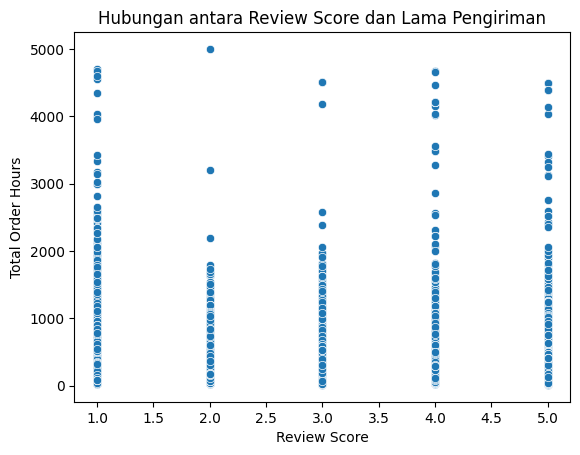

In [77]:
sns.scatterplot(x="review_score", y="total_order_hours", data=all_success_order_df)
plt.title("Hubungan antara Review Score dan Lama Pengiriman")
plt.xlabel("Review Score")
plt.ylabel("Total Order Hours")
plt.show()

In [78]:
all_success_order_df[["review_score", "total_order_hours"]].corr()

,review_score,total_order_hours
review_score,1.000000,-0.303704
total_order_hours,-0.303704,1.000000


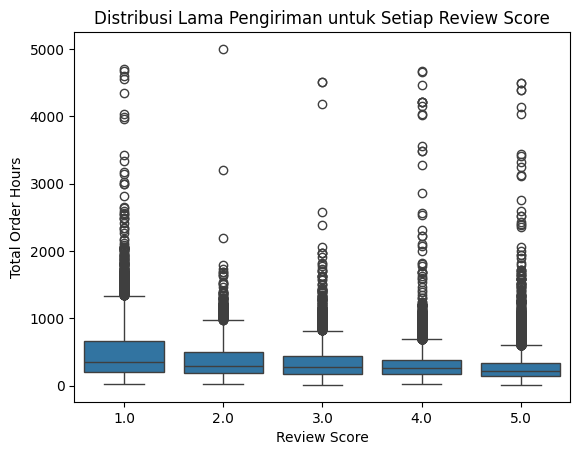

In [79]:
sns.boxplot(x="review_score", y="total_order_hours", data=all_success_order_df)
plt.title("Distribusi Lama Pengiriman untuk Setiap Review Score")
plt.xlabel("Review Score")
plt.ylabel("Total Order Hours")
plt.show()

## Visualization & Explanatory Analysis

### Bagaimana tren penjualan bulanan atau tiap kuartal?

#### Tren Penjualan Bulanan

In [80]:
monthly_order = all_success_order_df.resample(
    rule="M", on="order_purchase_timestamp"
).agg({"order_id": "nunique", "payment_value": "sum"})
monthly_order.index = monthly_order.index.strftime("%Y-%m")
monthly_order = monthly_order.reset_index()
monthly_order.rename(
    columns={"order_id": "order_count", "payment_value": "revenue"}, inplace=True
)
monthly_order["order_purchase_timestamp"] = pd.to_datetime(
    monthly_order["order_purchase_timestamp"]
)
monthly_order.head()

,order_purchase_timestamp,order_count,revenue
0,2016-10-01,265,61134.31
1,2016-11-01,0,0.00
2,2016-12-01,1,19.62
3,2017-01-01,729,172699.65
4,2017-02-01,1582,311871.96


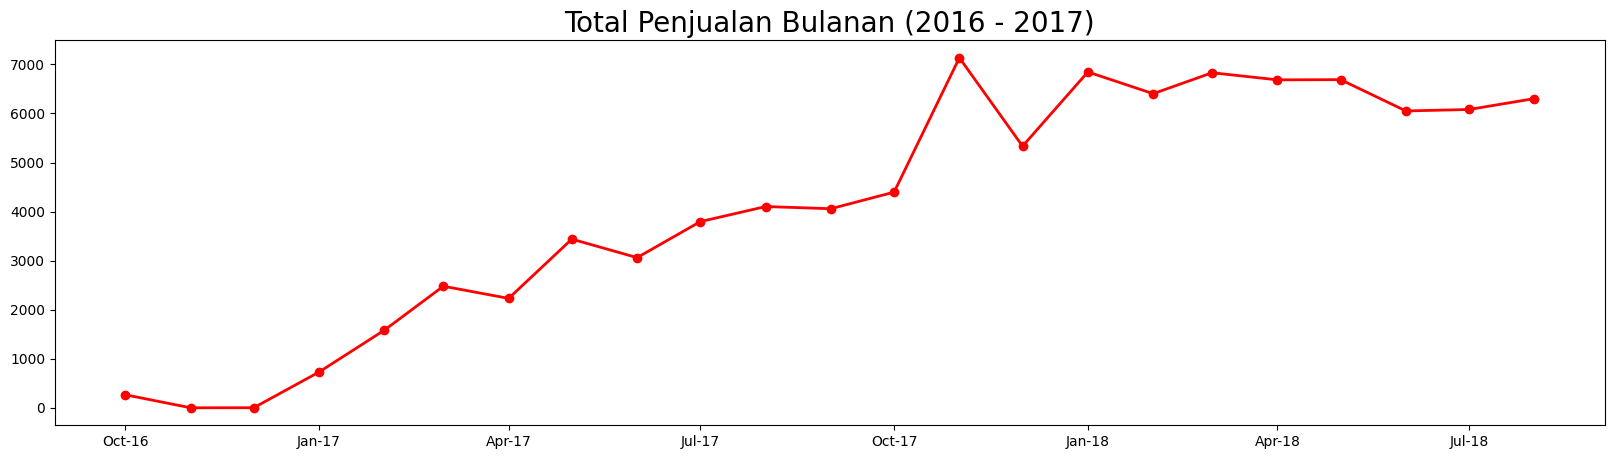

In [81]:
# Visualisasi Tren Penjualan Bulanan
plt.figure(figsize=(20, 5))
plt.plot(
    monthly_order["order_purchase_timestamp"],
    monthly_order["order_count"],
    marker="o",
    linewidth=2,
    color="r",
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

plt.title("Total Penjualan Bulanan (2016 - 2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Tren Penjualan Kuartalan

In [82]:
quarter_order = all_success_order_df.resample(
    rule="Q", on="order_purchase_timestamp"
).agg({"order_id": "nunique", "payment_value": "sum"})
quarter_order.index = quarter_order.index.strftime("%Y-%q")
quarter_order = quarter_order.reset_index()
quarter_order.rename(
    columns={"order_id": "order_count", "payment_value": "revenue"}, inplace=True
)
quarter_order["order_purchase_timestamp"] = pd.to_datetime(
    quarter_order["order_purchase_timestamp"]
)
quarter_order.head()

,order_purchase_timestamp,order_count,revenue
0,2016-12-31,266,61153.93
1,2017-03-31,4789,974514.37
2,2017-06-30,8729,1698094.13
3,2017-09-30,11955,2475655.44
4,2017-12-31,16864,3469924.36


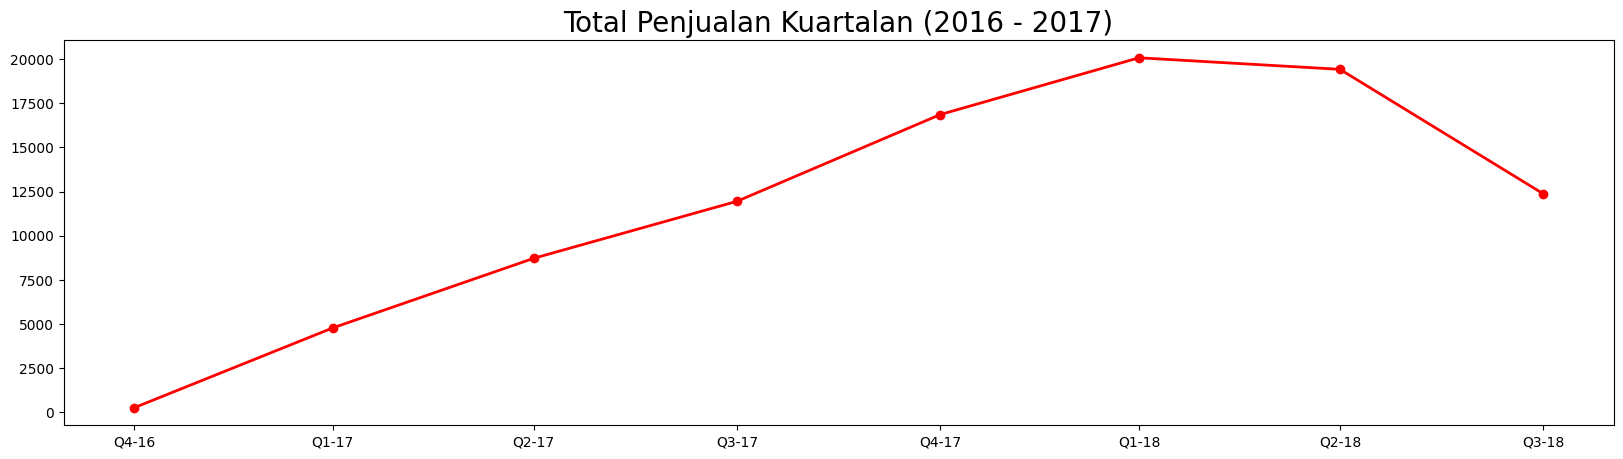

In [83]:
# Visualisasi Penjualan Kuartalan
plt.figure(figsize=(20, 5))
plt.plot(
    quarter_order["order_purchase_timestamp"],
    quarter_order["order_count"],
    marker="o",
    linewidth=2,
    color="r",
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

plt.title("Total Penjualan Kuartalan (2016 - 2017)", loc="center", fontsize=20)
plt.xticks(
    quarter_order["order_purchase_timestamp"],
    quarter_order["order_purchase_timestamp"].dt.to_period("Q").dt.strftime("Q%q-%y"),
    fontsize=10,
)
plt.yticks(fontsize=10)
plt.show()

### Berapa lama rata-rata waktu pengiriman produk?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21928\4168664841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_success_order_df.loc[:, "total_order_days"] = (


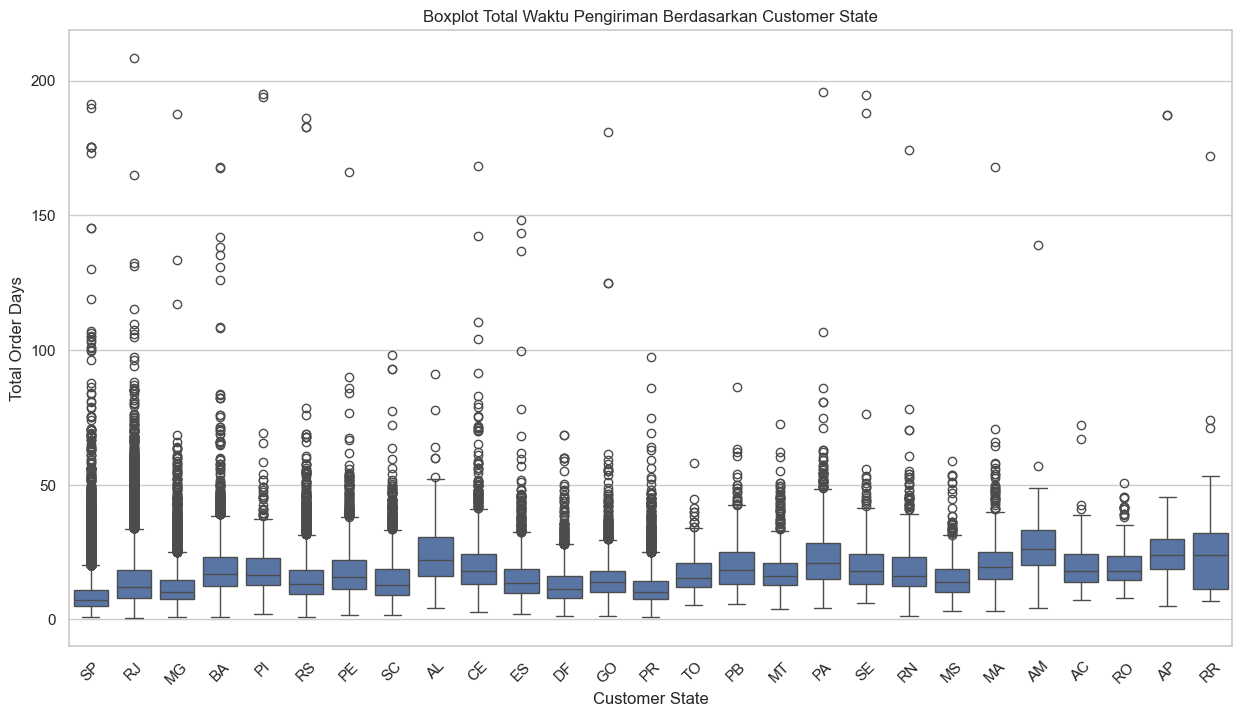

In [84]:
all_success_order_df.loc[:, "total_order_days"] = (
    all_success_order_df["order_delivered_customer_date"]
    - all_success_order_df["order_purchase_timestamp"]
)
all_success_order_df.loc[:, "total_order_days"] = all_success_order_df[
    "total_order_days"
].dt.total_seconds() / (60 * 60 * 24)

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))
sns.boxplot(x="customer_state", y="total_order_days", data=all_success_order_df)

plt.xticks(rotation=45)

plt.xlabel("Customer State")
plt.ylabel("Total Order Days")
plt.title("Boxplot Total Waktu Pengiriman Berdasarkan Customer State")

plt.show()

### Bagaimana kinerja penjualan di berbagai wilayah Brasil?

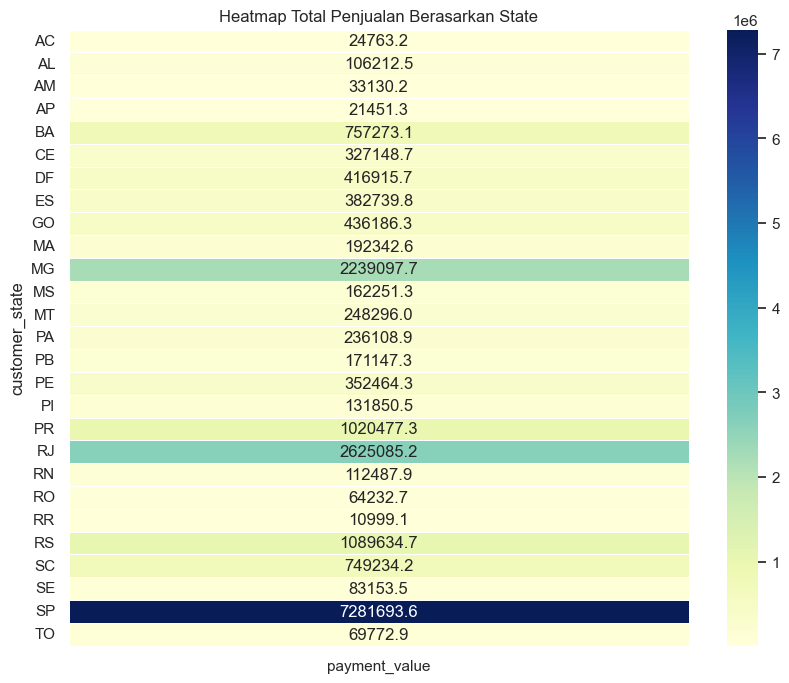

In [85]:
sales_performance_heatmap = all_success_order_df.pivot_table(
    index="customer_state", values="payment_value", aggfunc="sum"
)
plt.figure(figsize=(10, 8))
sns.heatmap(
    sales_performance_heatmap, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5
)
plt.title("Heatmap Total Penjualan Berasarkan State")
plt.show()

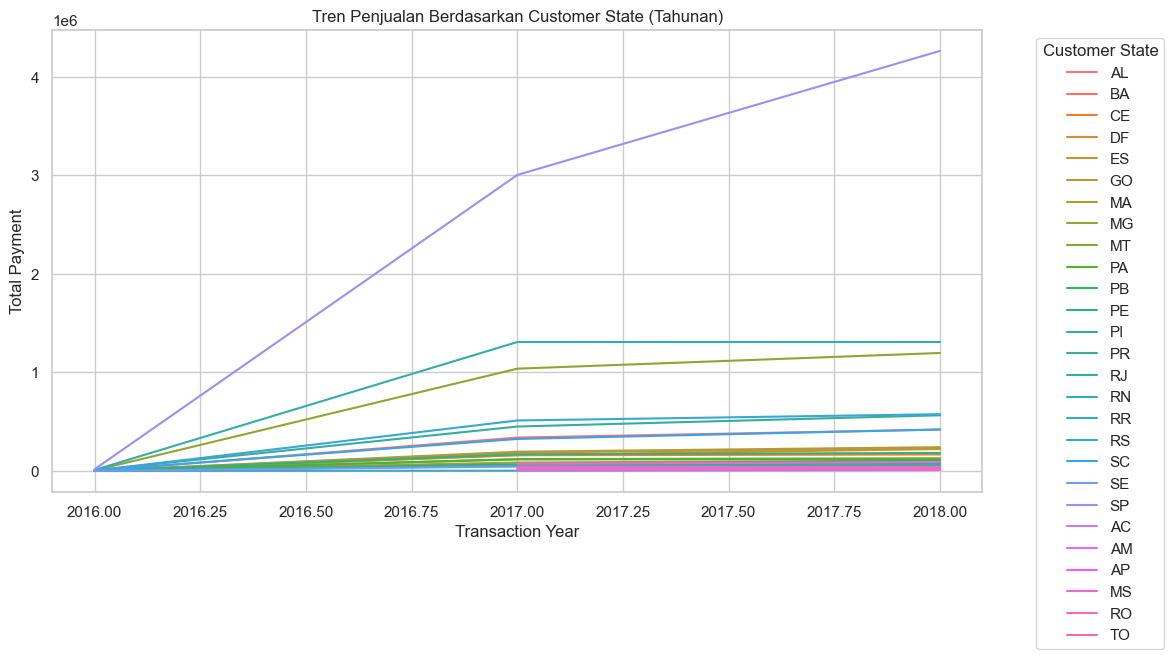

In [86]:
sales_performance_line = (
    all_success_order_df.groupby(["transaction_year", "customer_state"])[
        "payment_value"
    ]
    .sum()
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="transaction_year",
    y="payment_value",
    hue="customer_state",
    data=sales_performance_line,
)
plt.title("Tren Penjualan Berdasarkan Customer State (Tahunan)")
plt.xlabel("Transaction Year")
plt.ylabel("Total Payment")
plt.legend(title="Customer State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

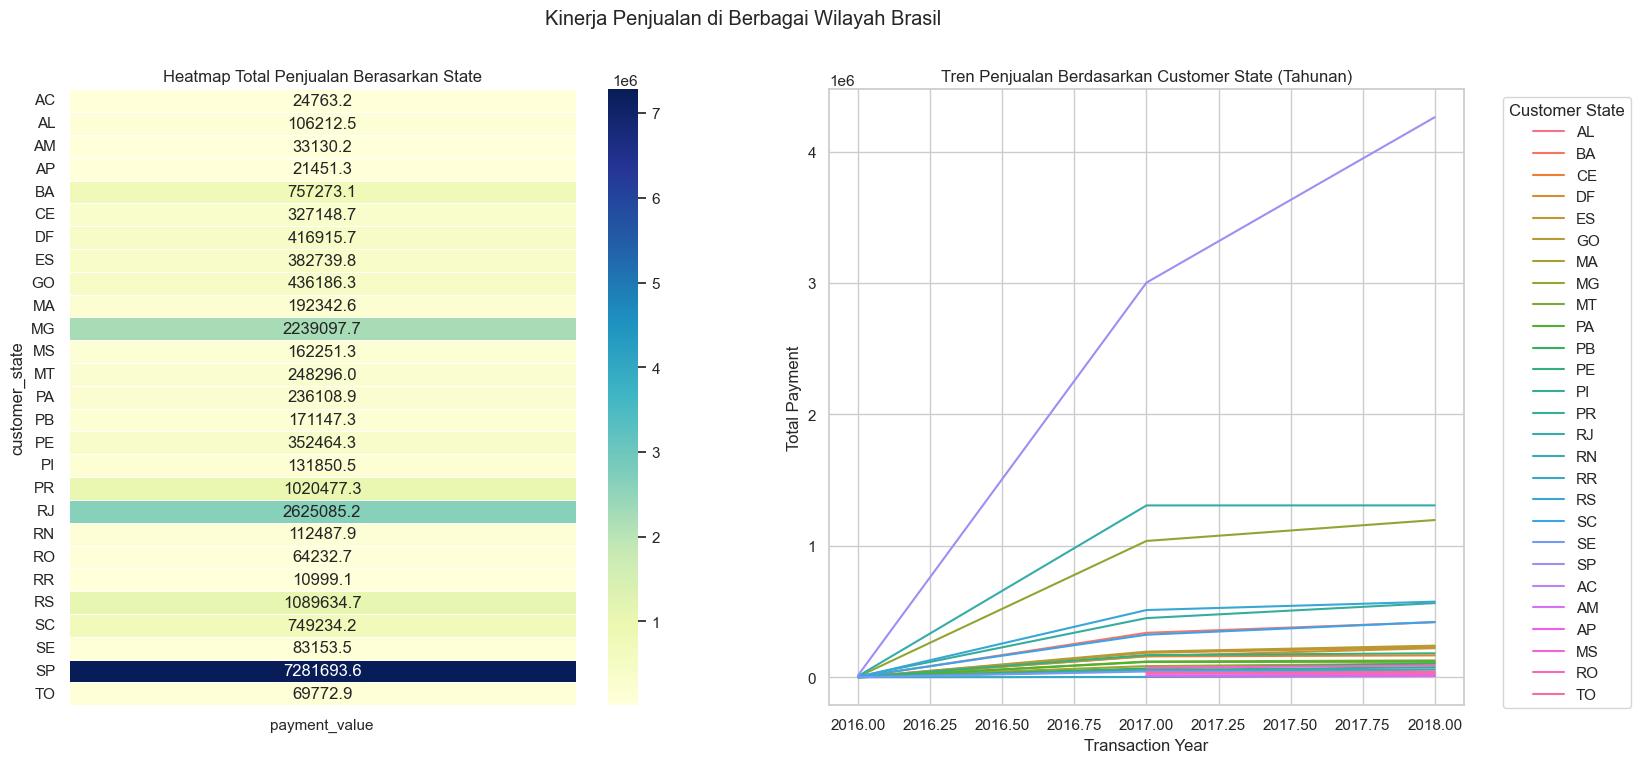

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot Heatmap
sales_performance_heatmap = all_success_order_df.pivot_table(
    index="customer_state", values="payment_value", aggfunc="sum"
)

sns.heatmap(
    sales_performance_heatmap,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    ax=axes[0],
)
axes[0].set_title("Heatmap Total Penjualan Berasarkan State")

# Plot Line Chart
sales_performance_line = (
    all_success_order_df.groupby(["transaction_year", "customer_state"])[
        "payment_value"
    ]
    .sum()
    .reset_index()
)
sns.lineplot(
    x="transaction_year",
    y="payment_value",
    hue="customer_state",
    data=sales_performance_line,
    ax=axes[1],
)
axes[1].set_title("Tren Penjualan Berdasarkan Customer State (Tahunan)")
axes[1].set_xlabel("Transaction Year")
axes[1].set_ylabel("Total Payment")
axes[1].legend(title="Customer State", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout(pad=3.0)
plt.suptitle("Kinerja Penjualan di Berbagai Wilayah Brasil")
plt.show()

### Hari apa yang customer sering untuk melakukan transaksi?

In [88]:
all_success_order_df.groupby("transaction_day")["order_id"].count()

transaction_day
Friday       16039
Monday       18212
Saturday     12104
Sunday       13332
Thursday     16770
Tuesday      18197
Wednesday    17517
Name: order_id, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21928\3973553561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


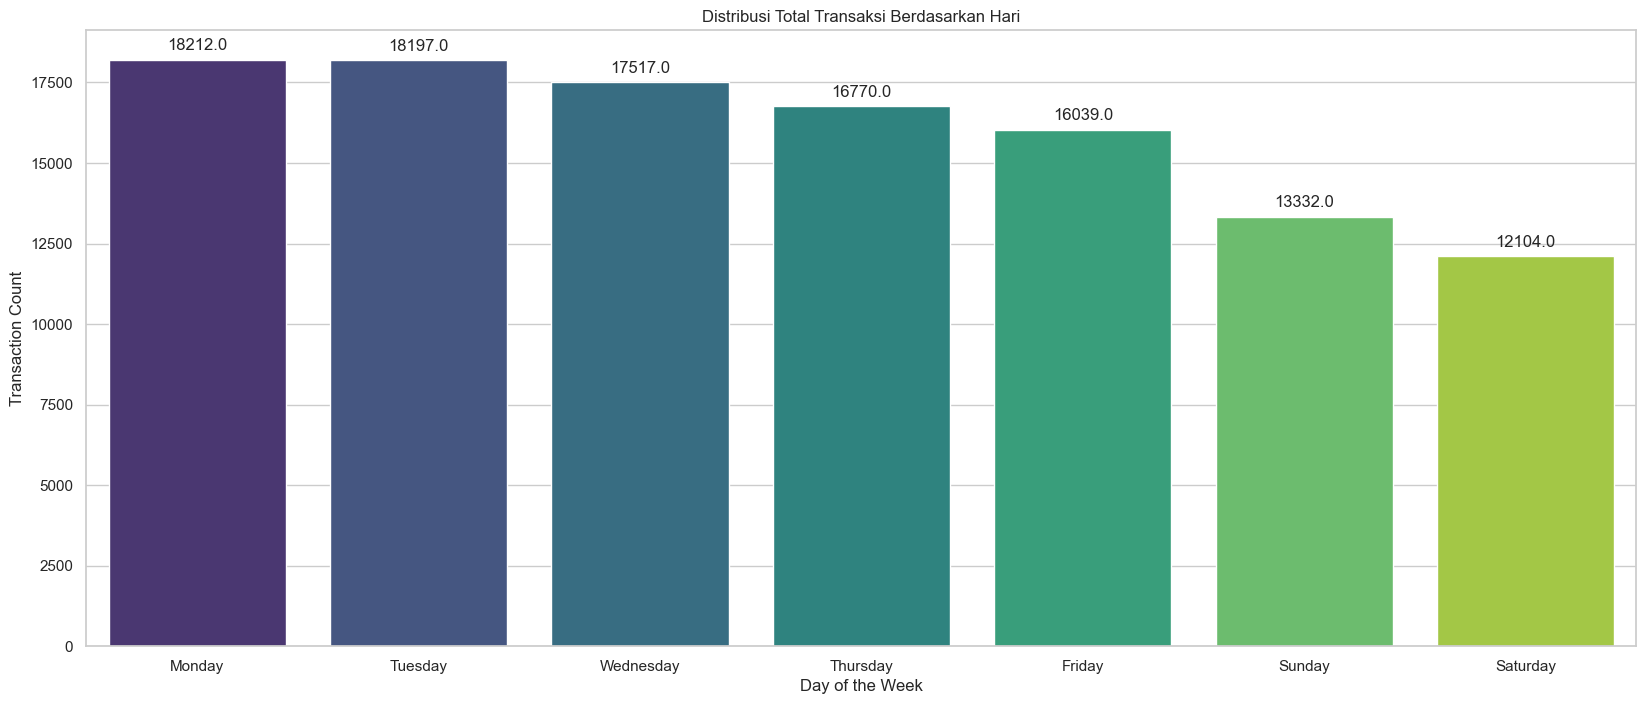

In [89]:
sorted_days = all_success_order_df["transaction_day"].value_counts().index

plt.figure(figsize=(20, 8))
ax = sns.countplot(
    x="transaction_day", data=all_success_order_df, palette="viridis", order=sorted_days
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

plt.title("Distribusi Total Transaksi Berdasarkan Hari")
plt.xlabel("Day of the Week")
plt.ylabel("Transaction Count")
plt.show()

In [90]:
all_success_order_df.head()

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,product_id,...,seller_city,seller_state,shipping_limit_date,total_order_time,transaction_day,transaction_month,transaction_year,transaction_hour,total_order_hours,total_order_days
0,e17e4f88e31525f7deef66779844ddce,1.0,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,5.0,1e9e8ef04dbcff4541ed26657ea517e5,...,sao paulo,SP,2018-04-30 17:33:54,3 days 00:25:24,Tuesday,April,2018,16,72.423333,3.017639
1,5236307716393b7114b53ee991f36956,1.0,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,5.0,3aa071139cb16b67ca9e5dea641aaa2f,...,sao paulo,SP,2018-02-06 19:11:15,15 days 18:31:32,Wednesday,January,2018,18,378.525556,15.771898
2,01f66e58769f84129811d43eefd187fb,1.0,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,5.0,96bd76ec8810374ed1b65e291975717f,...,sao paulo,SP,2018-07-11 21:30:20,2 days 02:06:15,Monday,July,2018,21,50.104167,2.087674
3,143d00a4f2dde4e0364ee1821577adb3,1.0,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,1.0,cef67bcfe19066a932b7673e239eb23d,...,indaiatuba,SP,2018-08-07 09:10:13,3 days 06:18:42,Friday,August,2018,8,78.311667,3.262986
4,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,5.0,9dc1a7de274444849c219cff195d0b71,...,sao paulo,SP,2018-04-17 01:30:23,2 days 21:35:07,Wednesday,April,2018,1,69.585278,2.899387


### Bagaimana pengaruh tingkat kepuasan terhadap lama pengiriman?

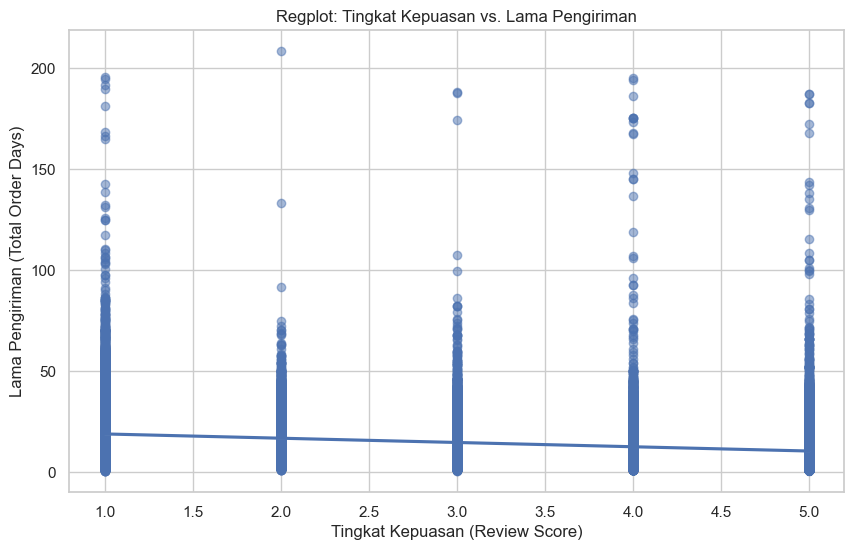

In [91]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="review_score",
    y="total_order_days",
    data=all_success_order_df,
    scatter_kws={"alpha": 0.5},
)
plt.title("Regplot: Tingkat Kepuasan vs. Lama Pengiriman")
plt.xlabel("Tingkat Kepuasan (Review Score)")
plt.ylabel("Lama Pengiriman (Total Order Days)")
plt.show()

## Conclusion

**Bagaimana tren penjualan bulanan atau tiap kuartal?**  
- Tren Penjualan Bulanan:  
Dengan menggunakan data penjualan, saya membuat line plot yang menggambarkan tren penjualan bulanan selama periode waktu yang diamati. Pada plot ini, sumbu x mewakili bulan, sedangkan sumbu y menunjukkan total nilai penjualan. Dari visualisasi ini, dapat terlihat apakah ada pola atau tren penjualan bulanan yang relatif meningkat tiap bulan.
- Tren Penjualan Kuartalan:  
Saya juga membuat line plot yang membagi data penjualan ke dalam kuartal. Setiap titik pada plot ini mewakili total penjualan untuk setiap kuartal. Pola yang terlihat dari tren penjualan kuartalan menunjukkan peningkatan yang cukup stabil, tetapi terdapat penurunan di Q3 tahun 2018.  
  
**Berapa lama rata-rata waktu pengiriman produk?**  
Dapat disimpulkan bahwa waktu pengiriman pesanan sangat dipengaruhi oleh lokasi pelanggan. Beberapa negara memiliki waktu pengiriman yang lebih lama dibandingkan dengan yang lain. Ini disebabkan oleh berbagai faktor seperti jarak, infrastruktur pengiriman, dan lainnya.  

**Bagaimana kinerja penjualan di berbagai wilayah Brasil?**  
Kinerja penjualan di berbagai wilayah Brasil sangat beragam, tetapi berdasarkan data kinerja penjualan yang telah divisualisasikan, dapat disimpulkan bahwa kinerja penjualan yang paling baik berada di customer state (SP), dan kinerja penjualan yang sangat minim berada di customer state (RR)

**Hari apa yang customer sering untuk melakukan transaksi?**  
Jumlah transaksi tertinggi terjadi pada hari Jumat, diikuti oleh hari Kamis dan Rabu. Jumlah transaksi terendah terjadi pada hari Senin dan Minggu.

**Bagaimana pengaruh tingkat kepuasan terhadap lama pengiriman?**  
Berdasarkan visualisasi data menggunakan regression plot, pengaruh tingkat kepuasan terhadap lama pengiriman terdapat peningkatan kepuasan apabila lama pengirimannya lebih cepat, tetapi peningkatan yang terjadi tidak terlalu signifikan, berdasarkan hal tersebut, lama pengiriman pada dasarnya tidak terlalu berpengaruh terhadap tingkat kepuasan pelanggan

In [92]:
all_success_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112171 entries, 0 to 116597
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       112171 non-null  object         
 1   order_item_id                  112171 non-null  float64        
 2   order_status                   112171 non-null  object         
 3   order_purchase_timestamp       112171 non-null  datetime64[ns] 
 4   order_approved_at              112171 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   112171 non-null  datetime64[ns] 
 6   order_delivered_customer_date  112171 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  112171 non-null  datetime64[ns] 
 8   review_score                   112171 non-null  float64        
 9   product_id                     112171 non-null  object         
 10  product_category_name_english  112171 non-null  object       

In [93]:
all_success_order_df[
    ["product_category_name_english", "product_category_name"]
] = all_success_order_df[
    ["product_category_name_english", "product_category_name"]
].apply(
    lambda x: x.str.replace("_", " ")
)

all_success_order_df[
    [
        "customer_city",
        "seller_city",
        "order_status",
        "product_category_name_english",
        "product_category_name",
    ]
] = all_success_order_df[
    [
        "customer_city",
        "seller_city",
        "order_status",
        "product_category_name_english",
        "product_category_name",
    ]
].apply(
    lambda x: x.str.title()
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21928\740468175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_success_order_df[
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21928\740468175.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_success_order_df[


In [94]:
all_success_order_df.head()

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,product_id,...,seller_city,seller_state,shipping_limit_date,total_order_time,transaction_day,transaction_month,transaction_year,transaction_hour,total_order_hours,total_order_days
0,e17e4f88e31525f7deef66779844ddce,1.0,Delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,5.0,1e9e8ef04dbcff4541ed26657ea517e5,...,Sao Paulo,SP,2018-04-30 17:33:54,3 days 00:25:24,Tuesday,April,2018,16,72.423333,3.017639
1,5236307716393b7114b53ee991f36956,1.0,Delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,5.0,3aa071139cb16b67ca9e5dea641aaa2f,...,Sao Paulo,SP,2018-02-06 19:11:15,15 days 18:31:32,Wednesday,January,2018,18,378.525556,15.771898
2,01f66e58769f84129811d43eefd187fb,1.0,Delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,5.0,96bd76ec8810374ed1b65e291975717f,...,Sao Paulo,SP,2018-07-11 21:30:20,2 days 02:06:15,Monday,July,2018,21,50.104167,2.087674
3,143d00a4f2dde4e0364ee1821577adb3,1.0,Delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,1.0,cef67bcfe19066a932b7673e239eb23d,...,Indaiatuba,SP,2018-08-07 09:10:13,3 days 06:18:42,Friday,August,2018,8,78.311667,3.262986
4,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,Delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,5.0,9dc1a7de274444849c219cff195d0b71,...,Sao Paulo,SP,2018-04-17 01:30:23,2 days 21:35:07,Wednesday,April,2018,1,69.585278,2.899387


In [95]:
all_success_order_df.to_csv("data_seluruh_penjualan.csv", index=False)